In [2]:
import torch
import time
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


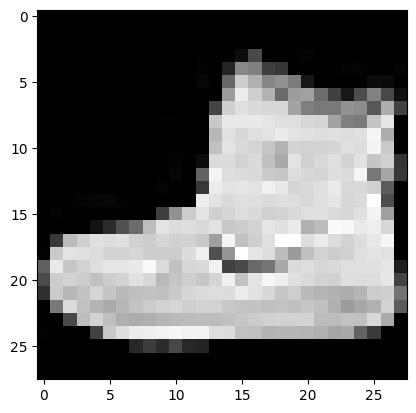

Label: 9


In [9]:
batch_size = 64  # Example batch size
dataloader = DataLoader(datasets, batch_size=batch_size)

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

dataloader = DataLoader(training_data, batch_size=batch_size)

# Print Image for the dataset using matplot
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using ", device)


Using  cpu


In [10]:
zero_time = time.time()
model = NeuralNetwork().to(device)
model.eval()

start_time = time.time()
total_samples = 0
with torch.no_grad():
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # print the predicted label
        print(pred.argmax(1))
        # print the actual label
        print(y)
        total_samples += X.size(0)

if device.type == 'cuda':
    torch.cuda.synchronize() # Make sure all operations are finished

end_time = time.time()
elapsed_time = end_time - start_time
throughput = total_samples / elapsed_time

print(f"Total samples : {total_samples}")
print(f"Throughput: {throughput:.2f} samples/second")
print(f"Latency: {end_time - zero_time}")

Streaming output truncated to the last 5000 lines.
        3, 9, 6, 5, 9, 2, 4, 3, 8, 6, 8, 9, 8, 0, 2, 8])
tensor([9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 9, 9, 9, 1, 9, 9, 8, 1, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9,
        0, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 0, 1, 9, 9])
tensor([9, 6, 2, 4, 3, 2, 9, 5, 0, 9, 2, 5, 0, 0, 1, 5, 3, 0, 7, 4, 9, 6, 3, 3,
        0, 9, 0, 0, 1, 9, 4, 0, 5, 0, 3, 3, 9, 0, 8, 3, 6, 6, 2, 9, 2, 2, 4, 7,
        7, 4, 9, 5, 5, 4, 5, 3, 6, 1, 5, 4, 5, 6, 2, 2])
tensor([9, 9, 9, 9, 0, 8, 9, 8, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 8, 9, 9, 9, 9, 9, 1, 9, 9, 8, 0, 9, 1])
tensor([6, 9, 5, 0, 1, 7, 9, 7, 2, 6, 4, 5, 9, 1, 9, 3, 8, 5, 2, 4, 9, 3, 4, 9,
        0, 9, 1, 5, 3, 8, 8, 1, 6, 7, 9, 5, 4, 3, 0, 7, 0, 7, 1, 8, 1, 0, 9, 8,
        5, 2, 9, 7, 0, 1, 2, 4, 9, 4, 9, 5, 5, 1, 5, 4])
tensor([9, 9, 9, 9, 9, 9